# Creating Palettes with Glasbey

The ``glasbey`` library allows for the creation of colour palettes designed for use with categorical data using techniques from the paper [*Colour Displays for Categorical Images*](http://onlinelibrary.wiley.com/doi/10.1002/col.20327/abstract) by Glasbey, Heijden, Toh and Gray. You don't need to worry about the technical details however -- the ``glasbey`` library is easy to use. To demonstrate some examples we'll need to import ``glasbey``, and to visualize the colour palettes we'll use ``seaborn``.

In [1]:
import glasbey
import seaborn as sns

sns.set()

It is quite common to require a colour palette for some categorical data such that each category has a visually distinctive colour. Usually one relies upon predefined colour palettes such as those from [ColorBrewer](https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=3), or provided by your plotting library of choice. Unfortunately such palettes do not always meet your needs: perhaps they don't have enough distinct colours and you don't want to re-use or cycle the palette; perhaps you have specific constraints you want to apply to get a certain look to your palette. Fortunately we can use math and perceptual colour spaces to create new palettes that maximize the perceptual visual distinctiveness of colours within constraints.

At it's most straightforward you can simply ask ``glasbey`` to create a palette of a given size:

In [2]:
glasbey.create_palette(palette_size=12)

['#d21820',
 '#1869ff',
 '#008a00',
 '#f36dff',
 '#710079',
 '#aafb00',
 '#00bec2',
 '#ffa235',
 '#5d3d04',
 '#08008a',
 '#005d5d',
 '#9a7d82']

Staring at hexcodes is likely unedifying except for the determined of colour-fanatics. To make this a little simpler to see what is going on we can pass the resulting colour palette on to seaborn's ``palplot``.

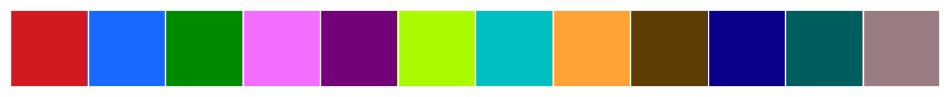

In [3]:
sns.palplot(glasbey.create_palette(palette_size=12))

As you can see we have a long colour palette with visually distinctive colours. The further along to the right we go the less distinctive the colours get (we start off making the largest distinctions we can), but all the colours are still well distinguished. Of course many pre-defined palettes have twelve colours. With ``glasbey`` we can go further ...

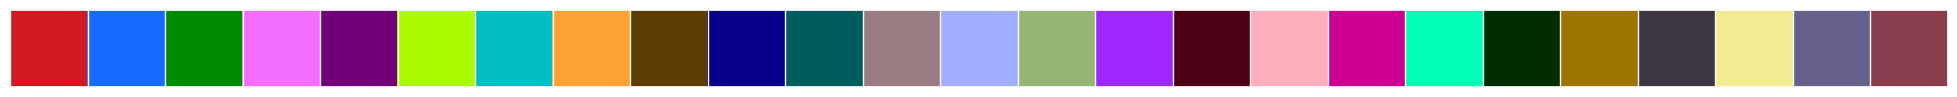

In [4]:
sns.palplot(glasbey.create_palette(palette_size=25))

And really there is no limit (beyond how difficult it will be to visually dinstinguish colours if we ask for too many). We can scale up with two hundred and fifty six colours with ease ...

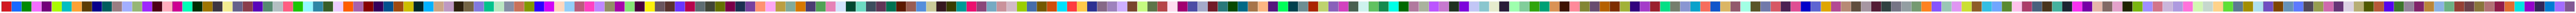

In [5]:
sns.palplot(glasbey.create_palette(palette_size=256))

Of course we could have simply pre-computed a two hundred and fifty six colour palette and then sub-selected from there is we are only concerned with how long the palette is. Perhaps we would like more control over the kinds of colours we will include in the palette. Fortunately we have that degree of control at our fingertips. We can specify bounds on the hue, chroma, and lightness of colours we want to accept for our palette. So, for example, if we want a palette consisting only of warm colours we can restrict the hue range to the violet to yellow, and the chroma to provide more saturated colours ...

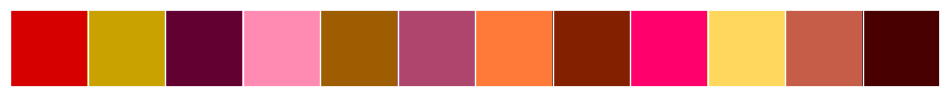

In [6]:
sns.palplot(glasbey.create_palette(palette_size=12, hue_bounds=(-90.0, 90.0), chroma_bounds=(50, 100)))

Or perhaps we simply want a more muted palette -- that is easily arranged by simply tightly bounding the lightness and chroma to provide only muted colours. Note how the palette starts out as a more muted version of our full palette, but we get deeper into the palette the colour selections change since we are in a more constrained space of colours, so maximal disntictiveness looks different ...

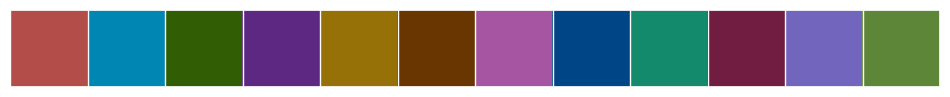

In [7]:
sns.palplot(glasbey.create_palette(palette_size=12, lightness_bounds=(20, 40), chroma_bounds=(40, 50)))

Not all plotting libraries are as happy with hex-code based colour palettes of course, so ``glasbey`` provides an option to turn that off, returning RGB triples (as used by seaborn and matplotlib for example).

In [8]:
glasbey.create_palette(12, as_hex=False)

[[0.8253968482191625, 0.09523805121713524, 0.12698415105153676],
 [0.09523861180830517, 0.41269835636247565, 0.9999999864533357],
 [3.4194691022282343e-07, 0.539682525067283, 0.0],
 [0.9523809411585668, 0.42857141875731036, 1.0],
 [0.4444444026116977, 3.847573004867044e-08, 0.4761905293532847],
 [0.6666667500952523, 0.9841268825761095, 0.0],
 [0.0, 0.7460317277234471, 0.7619048394629913],
 [1.0, 0.6349206981369385, 0.2063493503081597],
 [0.36507937649538397, 0.23809525004046506, 0.015873057042550695],
 [0.03174605985947745, 0.0, 0.5396825563267202],
 [0.0, 0.3650793759761799, 0.3650793716158441],
 [0.6031746381151896, 0.4920635128343684, 0.5079365325435788]]

### Performance Considerations

To ensure that you can quickly create palettes on an as needed basis the ``glasbey`` library uses a sampling of colours to select from to create a colour palette. A default approach has been chosen that provides a good trade-off between speed of palette creation and the actual quality of the palette generated. However, options are exposed to allow you to make your own choices about the performance/quality trade-off. The primary means of controlling this is the ``grid_size`` which specifies the side length of a cube-shaped grid of samples from RGB space. Thios means you will end up with a total of ``grid_size`` cubed many colours as options for your palette. Choosing a smaller ``grid_size`` will make palette creation much faster as many fewer colours need to be colour-space converted and searched to create a palette. The downside of a smaller ``grid_size`` is that we have a much poorer quality sampling or RGB space, and so the quality of the colour-distinctiveness of the resulting palette is impacted. Let's take a short tour through some potential ``grid_size`` values to see how this works.

Let's start with a ``grid_size`` of sixteen -- that gives a total of 4096 colours we can select from to create our palette.

CPU times: user 179 ms, sys: 16.2 ms, total: 195 ms
Wall time: 48.4 ms


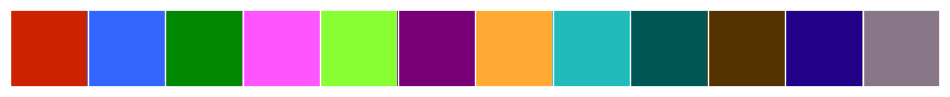

In [9]:
%%time
sns.palplot(glasbey.create_palette(palette_size=12, grid_size=16))

The upside is that palette creation took milliseconds; but with only 4096 colours to choose from this will tend to create sub-optimal palettes, particularly if we want to create a long palette with many colours in it.

Let's step that up and use a ``grid_size`` of thirty two -- that will give us a total of 32,768  colours to choose from.

CPU times: user 315 ms, sys: 31.2 ms, total: 347 ms
Wall time: 86.4 ms


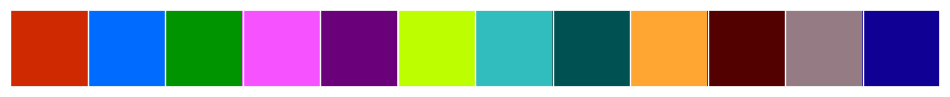

In [10]:
%%time
sns.palplot(glasbey.create_palette(palette_size=12, grid_size=32))

Palette creation time is now a tenth of a second, and we can see some different choices were made compared to the ``grid_size=16`` palette. This sort of setting is likely good enough for most short palettes.

Now let's try the default value of sixty-four for the ``grid_size``. This gives us 262,144 colours to choose from.

CPU times: user 2.12 s, sys: 140 ms, total: 2.26 s
Wall time: 565 ms


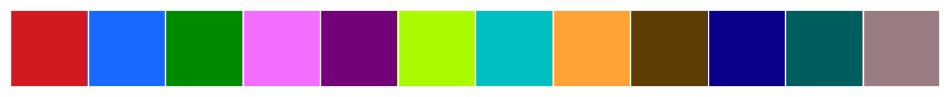

In [11]:
%%time
sns.palplot(glasbey.create_palette(palette_size=12, grid_size=64))

As you can see, adding granularity to the colours we choose from has managed to juggle th choices made somewhat, but the qualitative differences between selected colours (up to re-ordering) are relatively small.

We can got higher. A ``grid_size`` of one-hundred-twenty-eight gives over two-million colours to choose from.

CPU times: user 9.76 s, sys: 1.24 s, total: 11 s
Wall time: 4.94 s


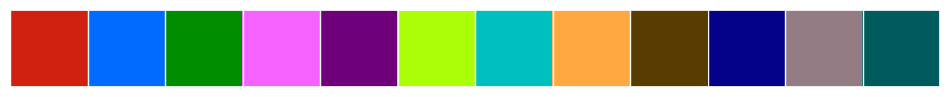

In [12]:
%%time
sns.palplot(glasbey.create_palette(palette_size=12, grid_size=128))

Finally a ``grid_size`` of 256 samples the full range of standard 24-bit colour that can be displayed, so we are as accurate as it is possible to be given the constraints of RGB space. This takes a lot longer to create a palette, but if you want as much accuracy as possible, or are willing to invest some time to pre-create a large palette for later re-use, then this is the right option.

CPU times: user 37.6 s, sys: 8.03 s, total: 45.6 s
Wall time: 37.2 s


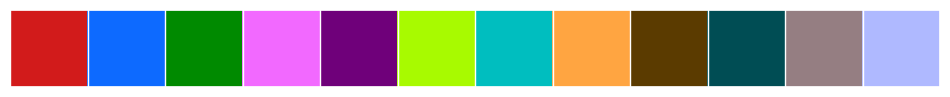

In [13]:
%%time
sns.palplot(glasbey.create_palette(palette_size=12, grid_size=256))

There are further options for ``grid_size``, and even the ability to specify a ``grid_space`` (currently only RGB and JCh are supported). For example if we want to uniformly sample from lightness/chroma/hue space rather than RGB we can speicy ``grid_space="JCh"``; and we can specify ``grid_size`` as a tuple, giving the side lengths for each attribute of the sampling space. For example we may care about lightness, less so about sampling different chroma values, and sample more densely in hue...

CPU times: user 2.23 s, sys: 183 ms, total: 2.42 s
Wall time: 743 ms


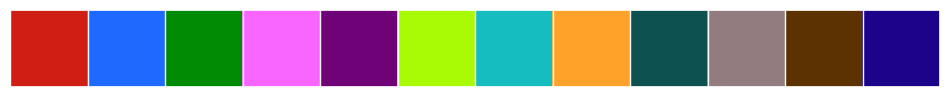

In [14]:
%%time
sns.palplot(glasbey.create_palette(palette_size=12, grid_size=(64, 32, 256), grid_space="JCh"))

Hopefully this gives some idea of what can be done in the way of creating colour palettes using ``glasbey``.